In [50]:
import numpy as np 
from src.models.Descriptive import NRM 
from src.utils.plot import plot_spike

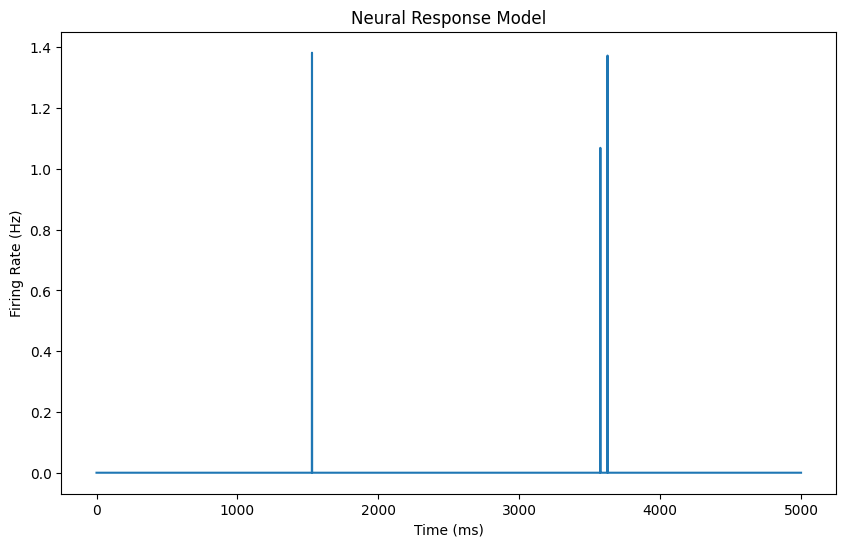

In [52]:
duration = 5 
hz = 1000
epochs = duration * hz 
input_stimulus = np.random.randn(epochs)
dt = 1/hz
kernel = np.array([0.1, 0.3, 0.6, 0.3, 0.1])
firing_rates = NRM.LNP(kernel,input_stimulus,None,dt).simulate()
plot_spike(np.arange(epochs),firing_rates,title="Neural Response Model",xlabel="Time (ms)",ylabel="Firing Rate (Hz)")

In [59]:
time_constant = 10.0  
external_input = np.random.randn(100)
dt = 0.01  
num_steps = 100 

In [60]:
model = NRM.ReLUModel(time_constant, dt)
model.simulate(external_input)
firing_rate = model.get_firing_rate()

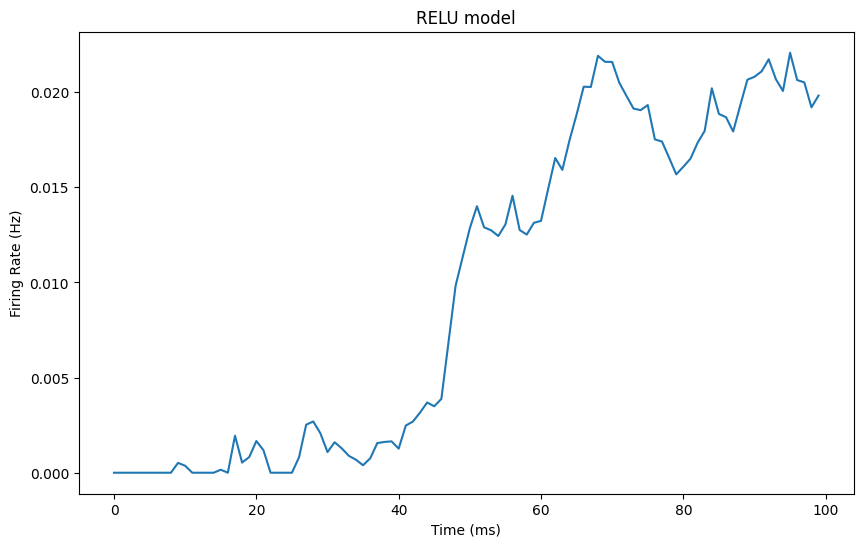

In [61]:
plot_spike(np.arange(num_steps),firing_rate,title="RELU model",xlabel="Time (ms)",ylabel="Firing Rate (Hz)")

In [62]:
from src.models.Descriptive import PRM 
firing_rate = 5
stimulus_intensity = 10
response_gain = 20

time_steps = 100
dt = 0.01

model = PRM.FRM(firing_rate, stimulus_intensity, response_gain)

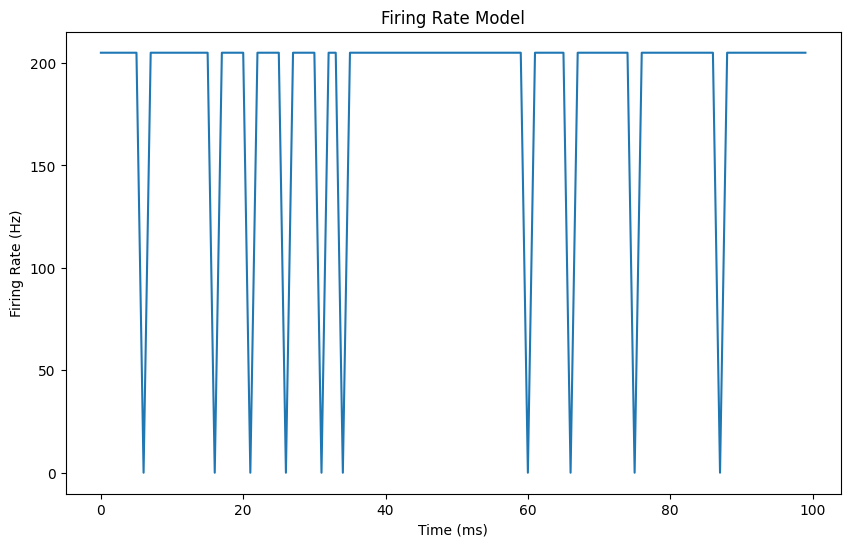

In [63]:
firing_rates = model.simulate(time_steps, dt)

plot_spike(np.arange(time_steps),firing_rates,title="Firing Rate Model",xlabel="Time (ms)",ylabel="Firing Rate (Hz)")

In [64]:
from src.models.Descriptive import PRM 
from src.utils.plot import plot_spike
import numpy as np
data_points = [2.5, 3.0, 3.2, 2.8, 3.5]

time_steps = 10000
dt = 0.001

model = PRM.GPM()
model.fit(data_points)

In [65]:
def update(frame):
    time = frame / 10.0 
    population_activity = model.simulate(time_steps, dt)
    line.set_data(time,population_activity)

    ax.relim()
    ax.autoscale_view()

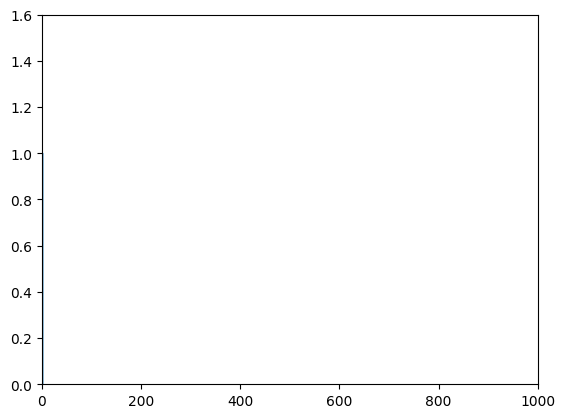

In [66]:
import matplotlib 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

fig,ax = plt.subplots()
ax.set_xlim(0,1000)
ax.set_ylim(0,1.6)
line, = ax.plot([],[],lw=2)
ani = FuncAnimation(fig,update,frames = np.arange(0,100),blit=False,interval=100)

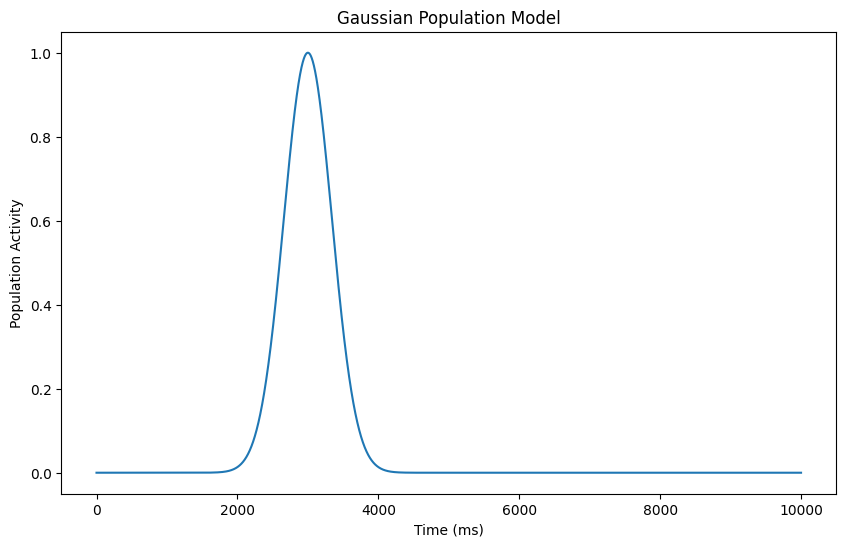

In [67]:
population_act = model.simulate(time_steps, dt)
plot_spike(np.arange(time_steps),population_act,title="Gaussian Population Model",xlabel="Time (ms)",ylabel="Population Activity")

In [68]:
from src.algorithms import spikes 
import numpy as np 

spike_waveforms = np.random.randn(4,5)
print(spike_waveforms)

[[ 0.24007169 -0.99538006 -0.97977271  1.24772     0.50459469]
 [-0.38417996  0.65858517 -0.50249731 -0.92058733 -2.01674685]
 [-0.46515746 -1.00047481 -0.31197468 -0.7253656   0.6525893 ]
 [ 0.30913288  0.24150653 -2.61514661  0.37593845  2.37340626]]


In [69]:
model = spikes.Classify_WF(spike_waveforms)
clusters = model.fit()

c:\Users\anisr\anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\anisr\anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\anisr\anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


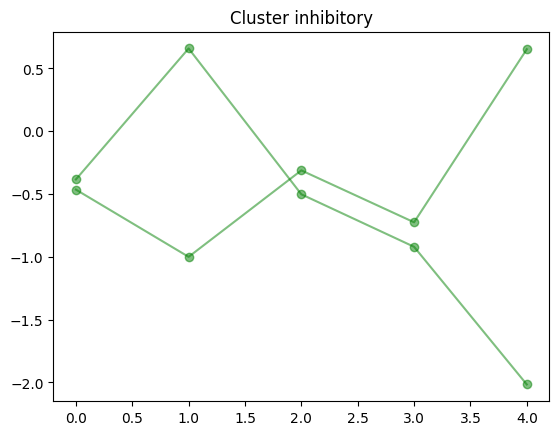

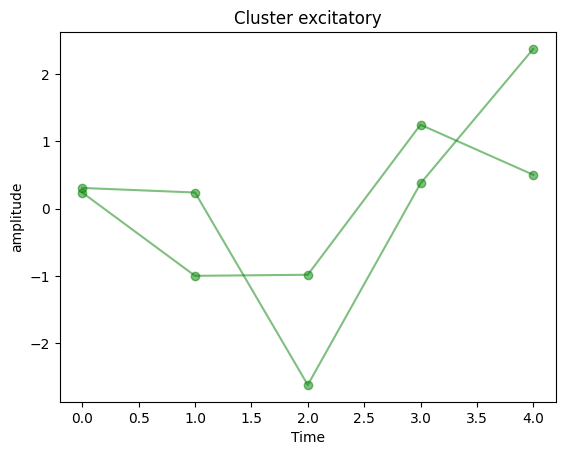

In [70]:
model.visualize()

In [71]:
from src.models.Descriptive import NFM
from src.utils.plot import plot_spike
import numpy as np

In [72]:
model = NFM.WCM(a=2,b=1.5,t_e=1.5,t_i=0.5)
model.initialize(0.2,0.2)
r_e,r_i,time = model.simulate(T=20.0)


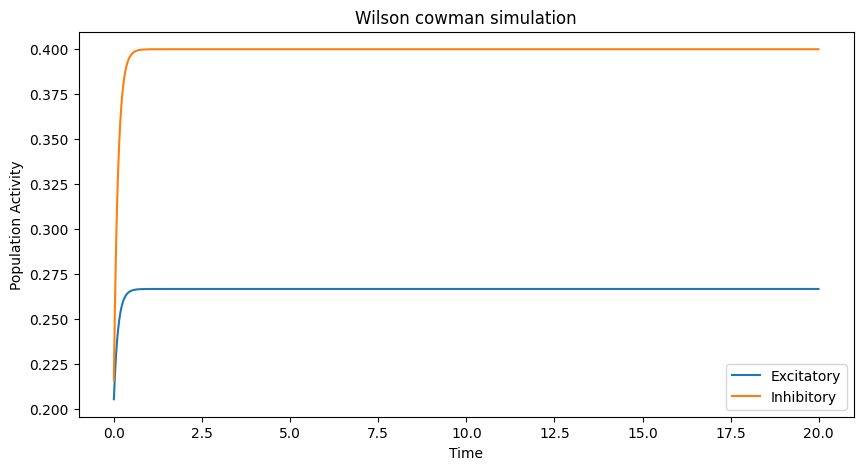

In [73]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.plot(time, r_e, label='Excitatory')
plt.plot(time, r_i, label='Inhibitory')
plt.xlabel('Time')
plt.ylabel('Population Activity')
plt.legend()
plt.title('Wilson cowman simulation');


In [74]:
from src.models.Descriptive import NFM
from src.utils.plot import plot_spike
import numpy as np
from decimal import Decimal


model = NFM.Amari()
model.initialize()
V,W = model.simulate(Int=3,T = 3)

Text(0, 0.5, 'Population Activity')

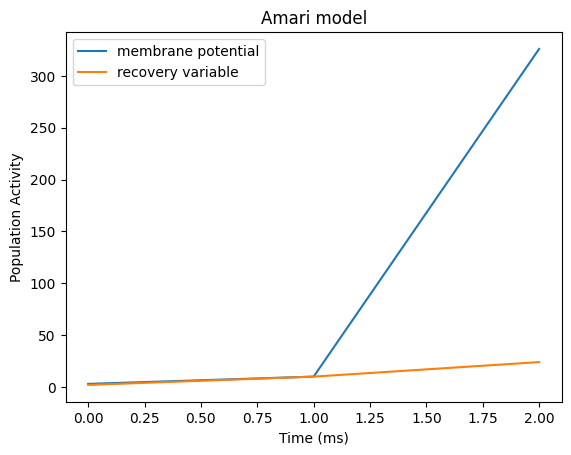

In [75]:
import matplotlib.pyplot as plt 
plt.plot(range(0,3),V,label = "membrane potential")
plt.plot(range(0,3),W,label = "recovery variable")
plt.legend()
plt.title("Amari model")
plt.xlabel("Time (ms)")
plt.ylabel("Population Activity")

In [76]:
import matplotlib.pyplot as plt 
from src.models.Interpretive import IFM
from src.utils.plot import plot_spike

In [77]:
import numpy as np 
In = np.zeros(1000)
In[200:800] = 1.
model = IFM.LIF()
time,membrane_potential, spikes = model.simulate(In)

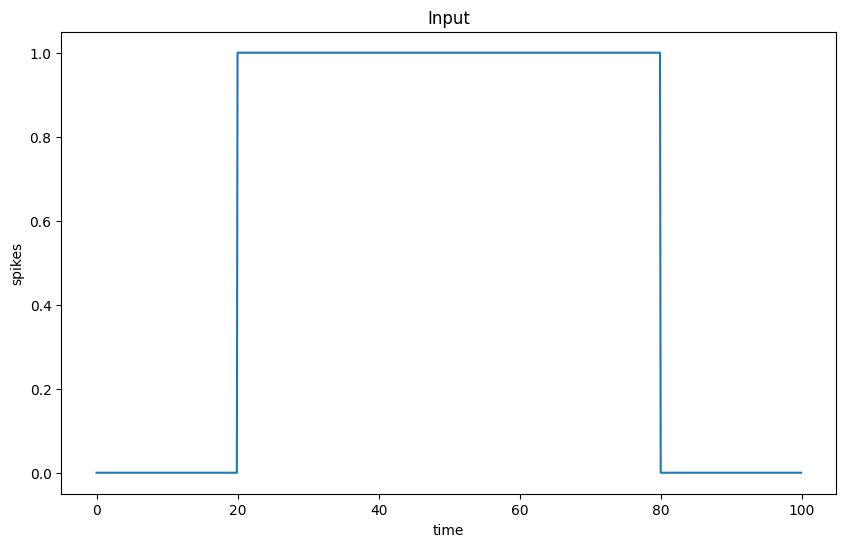

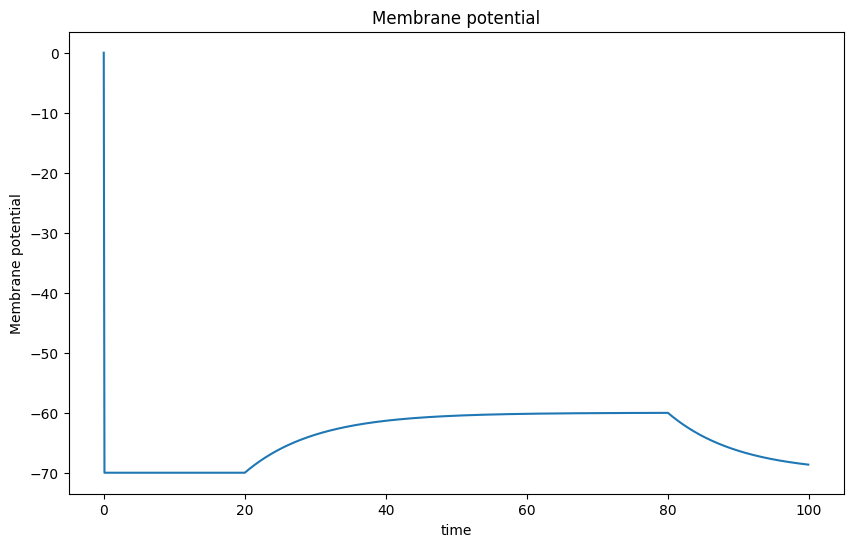

In [80]:
plot_spike(time,In,title="Input",xlabel="time",ylabel="spikes")
plot_spike(time, membrane_potential,title="Membrane potential",xlabel="time",ylabel="Membrane potential")

In [81]:
model = IFM.AdEx()
time,membrane_potential,spikes = model.simulate(In)

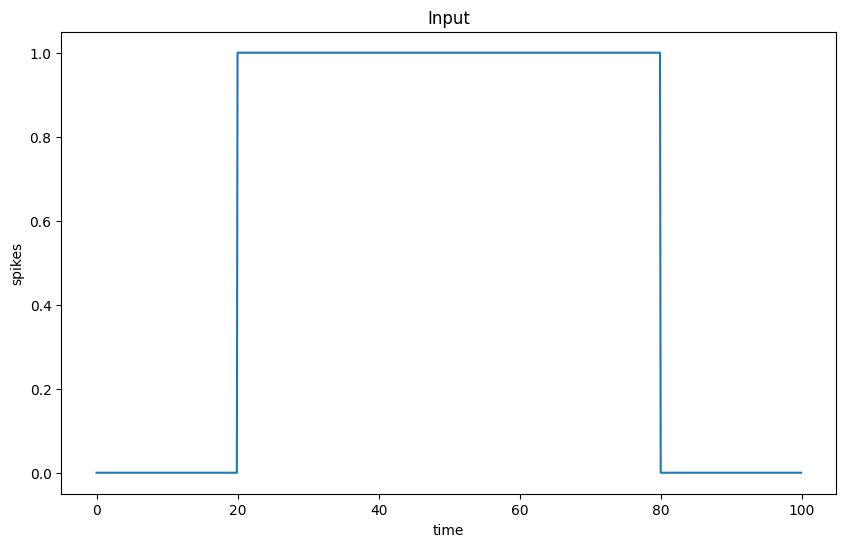

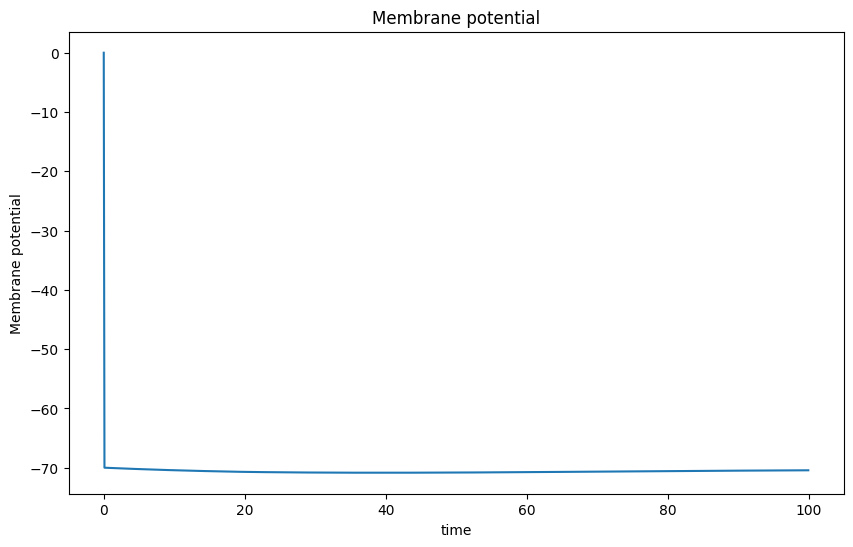

In [82]:
plot_spike(time, In,title="Input",xlabel="time",ylabel="spikes")
plot_spike(time, membrane_potential,title="Membrane potential",xlabel="time",ylabel="Membrane potential")

In [1]:
import matplotlib.pyplot as plt
from src.models.Interpretive import IFM
from src.utils.plot import plot_spike
import numpy as np

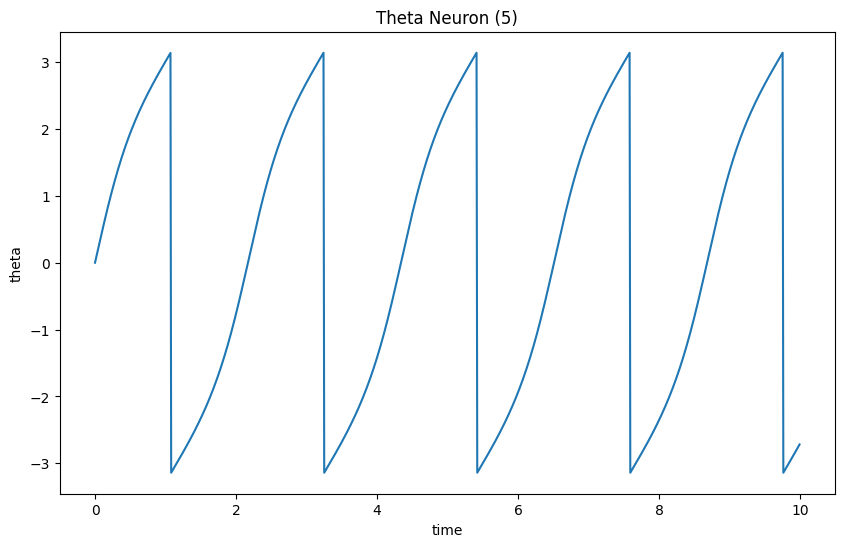

In [13]:
model = IFM.ThetaNeuron()
time,theta,spikes = model.simulate(10.,0.01)

plot_spike(time,theta,title=f"Theta Neuron ({len(spikes)})",xlabel="time",ylabel="theta")

In [21]:
from src.models.Mechanistic import HH 
from src.utils.plot import plot_spike

In [26]:
def current(t):
    return 10 if 20< t < 400 else 0

model = HH.OHH(duration=500,dt=0.01,inject_current=current)
t,V,n,m,h = model.simulate()

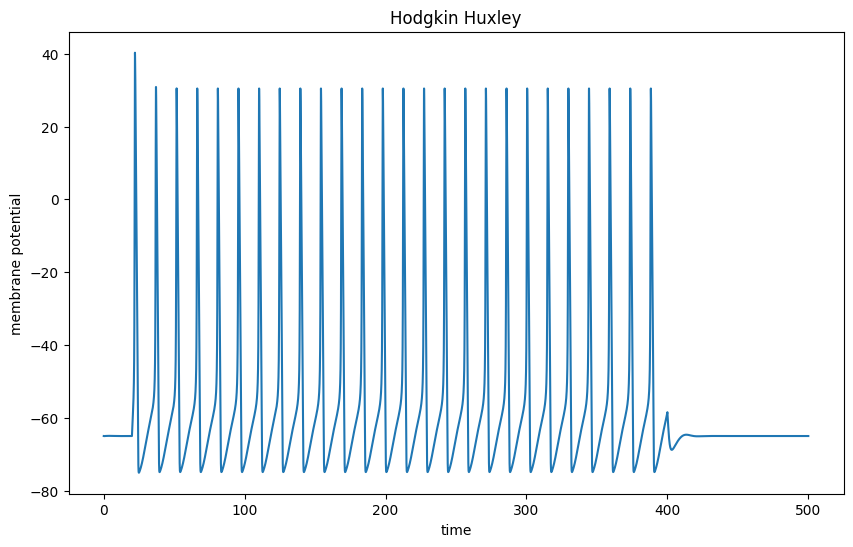

In [27]:
plot_spike(t,V,title="Hodgkin Huxley",xlabel="time",ylabel="membrane potential")

In [28]:
import numpy as np 
from src.models.Mechanistic import SYN 
from src.utils.plot import plot_spike

In [35]:
model = SYN.STDP()

spikes = np.random.randint(10,100,50)
model.simulate(spikes)

0.10200957169628401

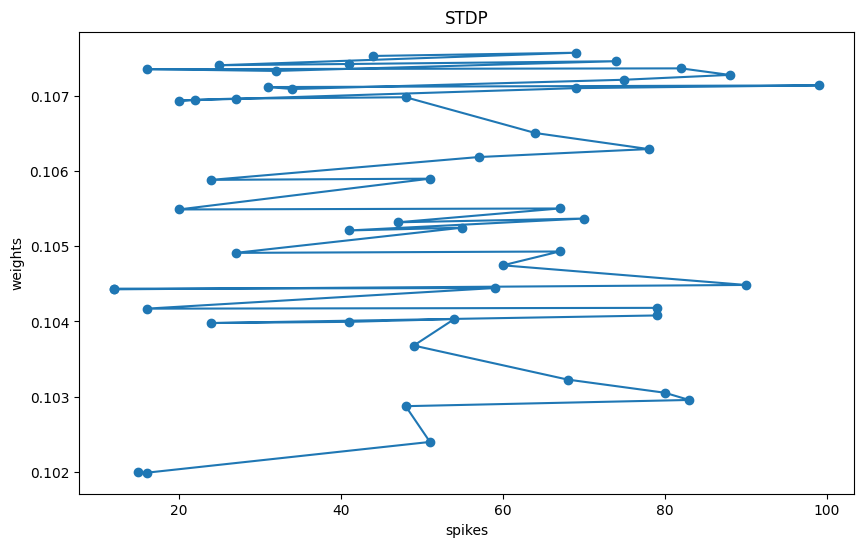

In [36]:
spikes_s = []
inp_s = []

for spike in spikes:
    weight = model.simulate([spike])
    spikes_s.append(weight)
    inp_s.append(spike)

plot_spike(inp_s,spikes_s,title="STDP",xlabel="spikes",ylabel="weights",marker='o')

In [15]:
from src.models.Mechanistic import SYN
from src.utils.plot import plot_spike
import numpy as np 

In [16]:
model = SYN.TMM()
spike_times = np.random.randint(10,100,6)
u,x = model.simulate(spike_times)

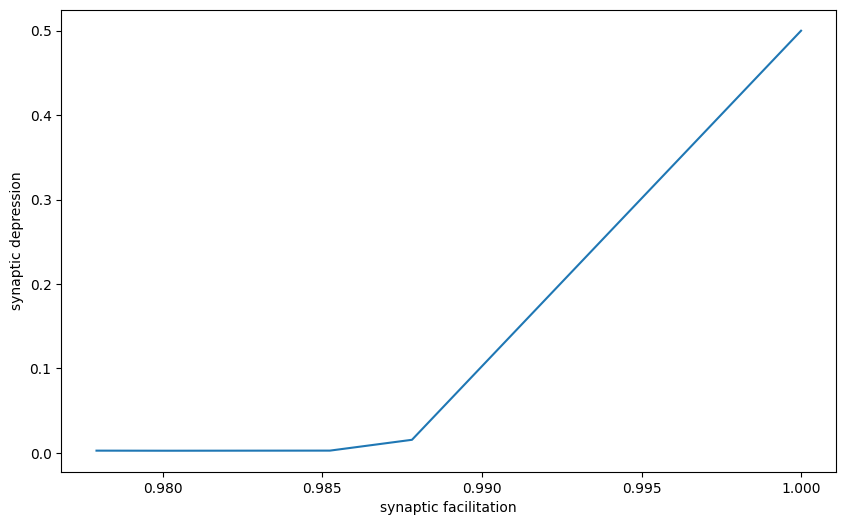

In [18]:
plot_spike(x,u,xlabel="synaptic facilitation",ylabel="synaptic depression")

In [16]:
from src.models.Mechanistic import BIO
from src.utils.plot import plot_spike
from src.utils.plot import plot_sep
import numpy as np

In [45]:
#c=-65, d=8 --> regular spiking
#c=-55, d=4 --> intrinsically bursting
#c=-50, d=2 --> chattering

#a = 0.1 --> fast spiking

model = BIO.IKM(a=0.1)

In [46]:
I_val = np.concatenate([np.zeros(100), np.ones(100) * 10, np.zeros(100), np.ones(100) * 10, np.zeros(100), np.ones(100) * 10, np.zeros(100)])

In [47]:
v,u = model.simulate(I_val)

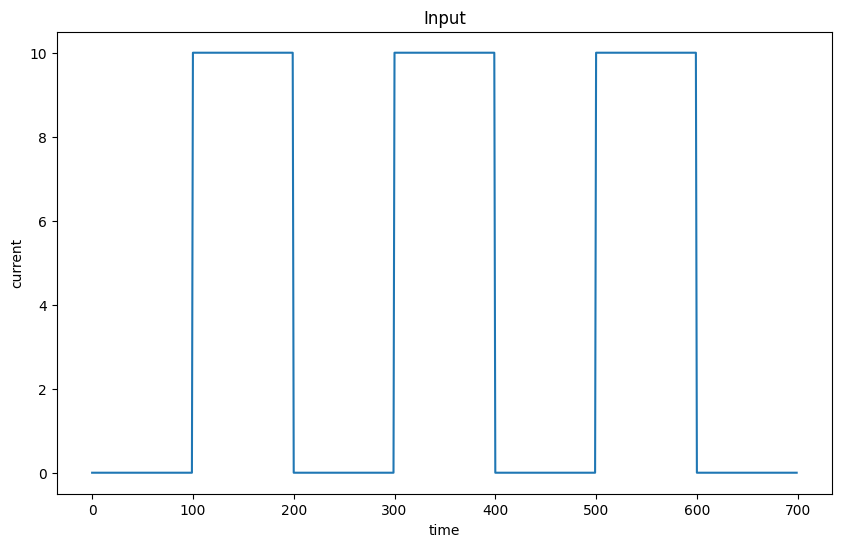

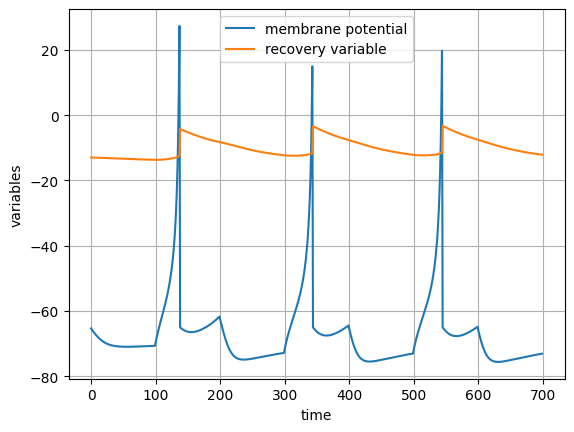

In [48]:
plot_spike(np.arange(len(I_val)),I_val,title="Input",xlabel="time",ylabel="current")
plot_sep(v,u,xlegend="membrane potential",ylegend="recovery variable",xlabel='time',ylabel='variables')

In [1]:
from src.models.Mechanistic import BIO
from src.utils.plot import plot_spike,plot_sep
import numpy as np

In [12]:
# a = 0.02 
# b = 0.1
# c = 0.9
magnitude = 0.9

model = BIO.FNM(magnitude)
time_steps = 100

v,u = model.simulate()

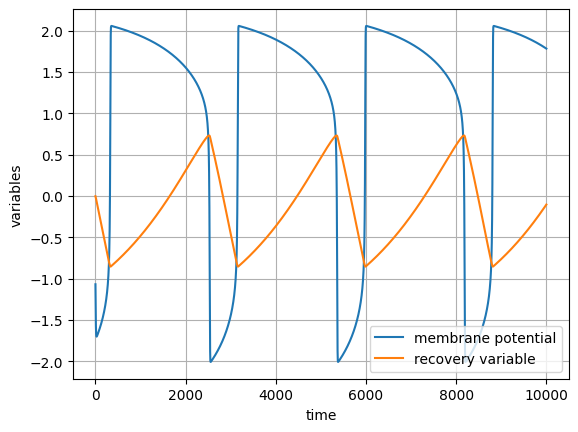

In [13]:
plot_sep(v,u,xlegend="membrane potential",ylegend="recovery variable",xlabel='time',ylabel='variables')